# Before you use this template

This template is just a recommended template for project Report. It only considers the general type of research in our paper pool. Feel free to edit it to better fit your project. You will iteratively update the same notebook submission for your draft and the final submission. Please check the project rubriks to get a sense of what is expected in the template.

---

# FAQ and Attentions
* Copy and move this template to your Google Drive. Name your notebook by your team ID (upper-left corner). Don't eidt this original file.
* This template covers most questions we want to ask about your reproduction experiment. You don't need to exactly follow the template, however, you should address the questions. Please feel free to customize your report accordingly.
* any report must have run-able codes and necessary annotations (in text and code comments).
* The notebook is like a demo and only uses small-size data (a subset of original data or processed data), the entire runtime of the notebook including data reading, data process, model training, printing, figure plotting, etc,
must be within 8 min, otherwise, you may get penalty on the grade.
  * If the raw dataset is too large to be loaded  you can select a subset of data and pre-process the data, then, upload the subset or processed data to Google Drive and load them in this notebook.
  * If the whole training is too long to run, you can only set the number of training epoch to a small number, e.g., 3, just show that the training is runable.
  * For results model validation, you can train the model outside this notebook in advance, then, load pretrained model and use it for validation (display the figures, print the metrics).
* The post-process is important! For post-process of the results,please use plots/figures. The code to summarize results and plot figures may be tedious, however, it won't be waste of time since these figures can be used for presentation. While plotting in code, the figures should have titles or captions if necessary (e.g., title your figure with "Figure 1. xxxx")
* There is not page limit to your notebook report, you can also use separate notebooks for the report, just make sure your grader can access and run/test them.
* If you use outside resources, please refer them (in any formats). Include the links to the resources if necessary.

# DLH Final Project - Team 111
## Members: Victoria Buszek

###Original Paper: Teacher Assistant-Based Knowledge Distillation Extracting Multi-level Features on Single Channel Sleep EEG (https://github.com/HychaoWang/SleepKD)

### Project Github Repo: https://github.com/VictoriaB52/DLH-TEAM-11-SleepKD.git
### Public Drive Folder: https://drive.google.com/drive/folders/1dVyrVmfOsPzFyKj_EW3G-mHUin5yICqs

### Running the Notebook

If I am understanding colab correctly, there shouldn't be any extra steps anyone needs to take to run this notebook. All of my my data that I am pulling for the notebook is located in a public Google Drive folder, which I access directly by link and download using gdown.

For all the libraries needed, I include a pip command to install the specific versions I need for the project and import them when necessary

Nonetheless I would recommend running the main.py file in my Github repo according to the ReadME instructions. I was working locally until transferring my contents into colab for the draft so I'm more confident in everything ruunning as expected there.

# Introduction
This is an introduction to your report, you should edit this text/mardown section to compose. In this text/markdown, you should introduce:

*   Background of the problem
  * what type of problem: disease/readmission/mortality prediction,  feature engineeing, data processing, etc
  * what is the importance/meaning of solving the problem
  * what is the difficulty of the problem
  * the state of the art methods and effectiveness.
*   Paper explanation
  * what did the paper propose
  * what is the innovations of the method
  * how well the proposed method work (in its own metrics)
  * what is the contribution to the reasearch regime (referring the Background above, how important the paper is to the problem).


# Background of the Problem

Determining what sleep stages a patient undergoes during the night and whether they experience any irregularities is helpful in diagnosing sleep disorders. One source of information for sleep stage classification is EEG recordings conducted throughout the night that, when grouped into intervals known as epochs, provide valuable information at both the epoch and sequence level. Deep learning is particularly suitable for such a parameter-rich task, and thus methods like SalientSleepNet and DeepSleepNet have been developed to automate a task that is typically labor intensive. By automating this process, we can have more and quicker diagnoses that can enable patients to seek treatment earlier and potentially lead to greater health outcomes Unfortunately, the authors note that the parameter-rich nature of sleep stage classification also makes these models computationally heavy and difficult to deploy in practice.

To address this particular issue, knowledge distillation methods have been developed to allow lighter "student" models to learn from "teacher" models. A teacher model is defined and trained as per usual. Then, a student model with a lower complexity (i.e. fewer layers) is defined. When training this student model, we also pass the soft labels outputted by the teacher knowledge and a loss function that is used to minimize the difference between the student's and teacher's predictions. The endgoal is to have a model that is less complex than the teacher, but achieves comparable performance.

 However, the authors state the application of current knowledge distillation method, such as KD [Hinton et al., 2015], Fitnets [Romero et al., 2014], on sleep stage classification is "unsatisfactory." They do not provide metrics for what this unsatisfactory performance exactly entails. However, when discussing the results of their experiment, which compared results of their own distillation method, SleepKD, with various baseline methods (more on those details later), they state that SleepKD was the only to achieve SOTA (state-of-the-art) accuracy. Again, they do not explicitly state what this value is but it generally refers to the best performance machine learning has to offer. The performance of the author's method was 87.05% and 85.66% on SalientSleepNet and DeepSleepNet respectively, with the next-best accuracy being 84.64% by the DKD method on SalientSleepNet. Thus, I am assuming the threhsold the authors are using to classify a model as not having SOTA performance is around the 85% mark.

In terms of reasons for this unsatisactory performance, the authors claim there are two. First, existing knowledge distillation methods do not capture multi-level (epoch and sequence) information well. Second, even when only dealing with one level of information, a large decrease in paramaters from teacher to student networks can lead to much information gained by the teacher network being lost in the transfer.

# Paper Explanation

The authors aimed to create a knowledge distillation method that addresses the aforementioned shortcomings of existing methods. Their proposed method, SleepKD, has three components that they claim makes it superior over other methods. The first two deal with the loss function used. To address the lack of multi-level information capture, the authors design the SleepKd loss function to take epoch- and sequence-level knowledge in the intermediate layers of a model and compute losses for both these aspects. The second loss-function innovation is to additionally compute soft and hard losses between teacher and student probability distributions and outcomes respectively. Finally, all four computed losses (epoch-level, sequence-level, soft and hard) are combined for a single overall loss score.

The third innovation the authors devise is to introduce a teacer assistant model. This is to address the issue of information loss when decreasing the complexit of a model from teacher to student too severely. The teacher assistant model has a complexity in between the teacher and student, so that the assistant can learn from the teacher and the student can learn from the assistant.

To test the effectiveness of this new approach, the authors perform sleep stage classification using two models: SalientSleepNet and DeepSleepNet. SalientSleepNet uses a purely CNN approach while DeepSleepNet uses a hybrid CNN and RNN approach. The source code for SalientSleepNet can be found at https://github.com/ziyujia/SalientSleepNet while the code for DeepSleepNet is located at https://github.com/akaraspt/deepsleepnet/tree/master. They further test these models with two public datasets: ISRUC-III (https://sleeptight.isr.uc.pt/) and Sleep-EDF(https://www.physionet.org/content/sleep-edfx/1.0.0/). While I'll go more into detail on the Sleep-EDF set in particular, for now just know that we are interested in extracting EEG readings that will be used as inputs.

 In addition to defining teacher/TA/student models and using SleepKD for loss, they implement 6 baseline knowledge distillation loss methods:
- KD (Hinton et al., 2015)
- Fitnets (Romero et al., 2014)
- NST (Huang and Wang, 2017)
- TAKD (Mirzadeh et al., 2021)
- DGKD (Son et al., 2021)
- DKD (Zhao et al., 2022)

They perform the same process for training/testing their models with each method and compare performance, specifically accuracies and f1-scores. As menioned before, their SleepKD was the only that achieved what they called SOTA performance. An image of the exact results are attached below, but we can see that SleepKD achieved highest scores for both datasets and both models.

In addition to comparing performance to baselines, the authors attach information comparing the overall performance and complexity of their final SleepKD teacher and student models. This is also shown below. From these results, we see that the student model achieves an accuracy score very similar to the teacher model. For SalientSleepNet, student accuracy is 79.66% compared to the teacher's 80.34%. DeepSleepNet's performance is even better, with student accuracy at 83.29% compared to the teacher's 83.97%. This performance is achieved with a much lighter model in both cases, defined as size in megabytes. SalientSleepNet's student model size is 119.19% smaller than the teacher model while DeepSleepNet's student model is 112.16% smaller. Furthermore, both see an immense decrease in the number of parameters used.

From these results, the authors seem to have achieved exactly what they set out to do: develop a knowledge distillation method that creates lighter models that can be deployed in the real world more easily, yet retain high performance.

# Scope of Reproducibility:

### List hypotheses from the paper you will test and the corresponding experiments you will run.


As I stated in my project proposal, the paper did not explicitly state what hypothesis the authors were aiming for. They just stated that they wanted to develop a distillation method that yielded betteer results than existing methods. In the proposal, I stated that the hypothesis for the project that I'd be seeking to achieve would be that by replicating the paper's approach, I would see SalientSleepNet and DeepSleepNet student models using SleepKD outperforming other baseline methods by having accuracy and f1-scores about two points higher than the next-best model.

### A Difficult Start

Unfortunately, this is where I must say that I experienced significant difficulties with working on the models defined in the paper and that greatly altered the scope of what I will be doing for this project. This is also where I will discuss these difficulties.

First, if we look at the SleepKD repository, we see that the only code the authors have provided is the knowledge method itself, SleepKD, implemented as subclass of the Karas.layers.Layer class. There is no code for preprocesing the datasets to be used in SalientSleepNet or DeepSleepNet. There is no code for how to use this SleepKD layer in context of either models, nor how to perform training or predictions. Thus, I found the repositories for SalientSleepNet and DeepSleepNet with hopes that fitting the layer in would not be too difficult.

Unfortunately, there were more issues found. Similar to SleepKD, SalientSleepNet only includes the model architecture but no code for preprocessing data for the model or actually running/evaluating it. DeepSleepNet was much better in this regard - there is plentiful code for downloading and preprocessing the data (they also used Sleep-EDF which was convenient) and instructions for training/predicting results from this data.

However, the DeepSleepNet source code uses many libararies that are now very out of date. For instance, they used tensorflow-gpu 1.15.1, with the most recent version of tensorflow being 2.16.1. This made going through and understanding the code difficult because for some modules, documentation has been removed or gives minimal parameter information (i.e. https://www.tensorflow.org/api_docs/python/tf/keras/backend). Additionally, the authors used tensorflow.nn as their library for neural network layers, but they also wrapped these calls in their own custom functions where they would do computations to dynamically determine the parameters used for the model, making this more difficult for me to follow along with.

Due to the code being deprecated and SleepKD using newer versions of tensorflow and keras, I thought I would have to migrate the code. Thus, I was spending much time trying to update out-of-date functions to use their newer counterparts. I got to a point where the issue wasn't an out of date function but the overall method of changing tensor values loaded from a session. The current impleentation was no longer recommended and and had no modern workaround, so that would require completely reworking the architecture. By this point I had a week left until the draft, so I gave up and decided to put up a virtual environment with compatible library versions. This itself took more time than I would've liked because even when trying to install the specified versions, I had dependency issues for tensorflow that took some time to figure out (the solution being to actually use Python 3.7 instead of 3.5 as had been specified in the repo). Here I was able to finally train DeepSleepNet according to the implementation details in the repo, but was still running into errors with predicting new outcomes.

By this point I looked back at the original point of the paper - using SleepKD - and had a horrible realization: in my panic to at least get DeepSleepNet running some output, I did not connect that SleepKD is a subclass of a keras Layer and the implementation of DeepSleepNet does not use those. I had no clue how I could actually implement the function in that context. Furthermore, neither the SleepKD paper nor repo gave many details on what the epoch- and sequence-level features that we were supposed to pass to the SleepKD layer even *were*. Weight parameters from the function models? Without knowing these details I wasn't even sure how I could try to build a similar method from scratch and inject that into the DeepSleepNet code.

### A New Hope

I was completely lost and went to office hours for assistance on Monday. This was a little less than a week before the draft deadline, and I was freaking out as I didn't even have one of the two models working, where the paper still required implementing this new SleepKD distillation method with multiple versions of the models and **also** writing up the baseline distillation methods from scratch since they don't have source code for keras implementations.

I showed the TA the repos and explained my problems. His advice was as follows: write up all the difficulties I've been having (hence the rant you've been reading, sorry about that), do my best in training the DeepSleepNet model and separately show an example of how knowledge distillation is supposed to work, not even worrying about using SleepKD as the method. This is because the method of using a layer as knowledge distillation seems to be quite unusual - the resources I've been able to find discuss using a keras Distillor object that takes teacher/student models as an input along with a loss function that isn't a Layer. The TA also expressed that keras is not commonly used anymore, which explains some of the difficulties in lacking resources I've been having.

With this advice in mind, and since running predictions using the original DeepSleepNet model was still encountering errors, I started on a different approach. I decided to replicate the architecture of DeepSleepNet as best as I could as a keras Model constructued with various keras Layers. If I got this working, I could then create a less complex version of the model with fewer layers and use a keras Distillor to perform distillation with some pre-defined loss functions. Looking back, rebuilding the model with keras was probably what I was supposed to do with the first place, but with the only implementation details in the paper being:

 "*In experiments of the CNN and RNN framework, we choose DeepSleepNet as a representative. DeepSleepNet has a learning rate of 0.00001. The number of training epochs is 200 for SleepEDF, 300 for ISRUC-III and the batch size is 20. The weights are α = 1.0, β = 0.1 and γ = δ = . We design corresponding TA and student network for SalientSleepNet and DeepSleepNet*",

I thought it sounded like they were using the original source code directly and were only additionally creating TA and student networks. But the time wasted on trying to migrate the code was already gone, and I had limited time left to try to put something together. Since my biggest concern was even being able to put something together, I honestly didn't think much about what my hypothesis would be.

What I was able to accomplish is as follows; I was able to get replicate the DeepSleepNet architecture in Keras, train the model with one epoch using the Sleep-EDF dataset, and perform predictions, albeit not very accurate. I was also able to use a Distiller to distil knowledge to a less complex model. Because I knew I'd only be running 1 epoch while I was putting the draft together, I figured the performance would be quite poor, so I suppose the vague hypotheses I had in mind were:

1. The replicated DeepSleepNet model using keras will predict sleep stages with sub-50% accuracy

2. Knowledge distillation from the teacher to a lighter student model will lead to decreased accuracy of the model



# Methodology

This methodology is the core of your project. It consists of run-able codes with necessary annotations to show the expeiment you executed for testing the hypotheses.

The methodology at least contains two subsections **data** and **model** in your experiment.

In [1]:
# install mne since it's not available by default
# get tensorflow 2.15.1 and 2.15.0 - need same versions as those used to save models locally
!pip install mne
!pip install tensorflow==2.15.1
!pip install keras==2.15.0

# import  packages you need
import numpy as np
import tensorflow as tf
import keras
import gdown
import mne
# from google.colab import drive

##  Data
Data includes raw data (MIMIC III tables), descriptive statistics (our homework questions), and data processing (feature engineering).
  * Source of the data: where the data is collected from; if data is synthetic or self-generated, explain how. If possible, please provide a link to the raw datasets.
  * Statistics: include basic descriptive statistics of the dataset like size, cross validation split, label distribution, etc.
  * Data process: how do you munipulate the data, e.g., change the class labels, split the dataset to train/valid/test, refining the dataset.
  * Illustration: printing results, plotting figures for illustration.
  * You can upload your raw dataset to Google Drive and mount this Colab to the same directory. If your raw dataset is too large, you can upload the processed dataset and have a code to load the processed dataset.

Throughout the next course of the report I will be referring to specific files in my repo. Again, that is here https://github.com/VictoriaB52/DLH-TEAM-11-SleepKD.git

I have only been using the Sleep-EDF dataset, which is publically available at https://www.physionet.org/content/sleep-edfx/1.0.0/. This dataset consists of PolySomnoGraphic recordings. Though a PolySomnoGraphic test consists of a variety of physiological readings used to determine if an individual has a sleeping disorder, including body movements and breathing level, we are interested in one specific reading: EEG readings on the fpz-cz channel. Thus, before we can do any predictions, we need to extract fpz-cz readings from the dataset.

Before even that, we need to actually obtain the dataset. It can simply be obtained by downloading the folder at the above link, which itself contains two folders with readings corresponding to two studies. We are interested in the data in the sleep-telemetry folder, which holds 44 PolySomnoGraphic results and 44 associated annotation files scored by experts. There are two results for each patient, as the test took place over two nights. So there are 22 patients represented. As an example, ST7011J0-PSG.edf is file name of patient ST701 and is their first night's recording. ST7012J0-PSG.edf is the file for their second night. In addition to the raw readings, each recording has an associated Hypnogram annotation file. These annotations describe the sleep stage a patient is in during each point of the night/recording. So for our first example, ST7011J0-PSG.edf, the associated annotation file is ST7011JP-Hypnogram.edf.

In my repo, the raw data is located in the "data" folder.

Once this data is obtained, it needs to be preprocessed to extract the fpz-cz channel EEG reading. Thankfully, DeepSleepNet provided source code for this. It is the prepare_physionet.py file located in the "DeepSleepNet Files" folder in my repo. To run it, one can run the following command in a terminal opened in the project root:

```
# python prepare_physionet.py --data_dir data --output_dir data/eeg_fpz_cz --select_ch 'EEG Fpz-Cz'
```





Explained briefly, this file collects all the edf files in the folder specified by --data_dir, separated them into lists containing reading and annotation files, and sorts such that when iterating over the reading list, we can access the corresponding annotation file by index.

For each recording, we iterate over the annotation file and determine the between 0-5 according to a dict defining annotation values to ints (i.e. "Sleep stage W": 0) . The movement and unknown stages are removed from the reading. For what remains, the dataset is split into 30-second epochs. Finally, these split epochs and labels are saved to a .npz file, along with the sampling rate and extracted header information.

Below is the entire commented out file used for preprocessing. Again, this is directly taken from the DeepSleepNet repo (https://github.com/akaraspt/deepsleepnet/blob/master/prepare_physionet.py)

In [2]:
# import glob
# import math
# import ntpath
# import os
# import shutil
# import urllib.request, urllib.parse, urllib.error
# import urllib.request, urllib.error, urllib.parse

# from datetime import datetime

# import numpy as np

# from mne import Epochs, pick_types, find_events
# from mne.io import concatenate_raws, read_raw_edf

# import dhedfreader


# # Label values
# W = 0
# N1 = 1
# N2 = 2
# N3 = 3
# REM = 4
# UNKNOWN = 5

# stage_dict = {
#     "W": W,
#     "N1": N1,
#     "N2": N2,
#     "N3": N3,
#     "REM": REM,
#     "UNKNOWN": UNKNOWN
# }

# uncomment this so we can use in plotting data later
class_dict = {
    0: "W",
    1: "N1",
    2: "N2",
    3: "N3",
    4: "REM",
    5: "UNKNOWN"
}

# ann2label = {
#     "Sleep stage W": 0,
#     "Sleep stage 1": 1,
#     "Sleep stage 2": 2,
#     "Sleep stage 3": 3,
#     "Sleep stage 4": 3,
#     "Sleep stage R": 4,
#     "Sleep stage ?": 5,
#     "Movement time": 5
# }

# EPOCH_SEC_SIZE = 30


# def main():
#     parser = argparse.ArgumentParser()
#     parser.add_argument("--data_dir", type=str, default="/data/physionet_sleep",
#                         help="File path to the CSV or NPY file that contains walking data.")
#     parser.add_argument("--output_dir", type=str, default="/data/physionet_sleep/eeg_fpz_cz",
#                         help="Directory where to save outputs.")
#     parser.add_argument("--select_ch", type=str, default="EEG Fpz-Cz",
#                         help="File path to the trained model used to estimate walking speeds.")
#     args = parser.parse_args()

#     # Output dir
#     if not os.path.exists(args.output_dir):
#         os.makedirs(args.output_dir)
#     else:
#         shutil.rmtree(args.output_dir)
#         os.makedirs(args.output_dir)

#     # Select channel
#     select_ch = args.select_ch

#     # Read raw and annotation EDF files
#     psg_fnames = glob.glob(os.path.join(args.data_dir, "*PSG.edf"))
#     ann_fnames = glob.glob(os.path.join(args.data_dir, "*Hypnogram.edf"))
#     psg_fnames.sort()
#     ann_fnames.sort()
#     psg_fnames = np.asarray(psg_fnames)
#     ann_fnames = np.asarray(ann_fnames)

#     for i in range(len(psg_fnames)):
#         # if not "ST7171J0-PSG.edf" in psg_fnames[i]:
#         #     continue

#         raw = read_raw_edf(psg_fnames[i], preload=True, stim_channel=None)
#         sampling_rate = raw.info['sfreq']
#         raw_ch_df = raw.to_data_frame(scaling_time=100.0)[select_ch]
#         raw_ch_df = raw_ch_df.to_frame()
#         raw_ch_df.set_index(np.arange(len(raw_ch_df)))

#         # Get raw header
#         f = open(psg_fnames[i], 'r', encoding='iso-8859-1')
#         reader_raw = dhedfreader.BaseEDFReader(f)
#         reader_raw.read_header()
#         h_raw = reader_raw.header
#         f.close()
#         raw_start_dt = datetime.strptime(h_raw['date_time'], "%Y-%m-%d %H:%M:%S")

#         # Read annotation and its header
#         f = open(ann_fnames[i], 'r', encoding='iso-8859-1')
#         reader_ann = dhedfreader.BaseEDFReader(f)
#         reader_ann.read_header()
#         h_ann = reader_ann.header
#         _, _, ann = list(zip(*reader_ann.records()))
#         f.close()
#         ann_start_dt = datetime.strptime(h_ann['date_time'], "%Y-%m-%d %H:%M:%S")

#         # Assert that raw and annotation files start at the same time
#         assert raw_start_dt == ann_start_dt

#         # Generate label and remove indices
#         remove_idx = []    # indicies of the data that will be removed
#         labels = []        # indicies of the data that have labels
#         label_idx = []
#         for a in ann[0]:
#             onset_sec, duration_sec, ann_char = a
#             ann_str = "".join(ann_char)
#             label = ann2label[ann_str]
#             if label != UNKNOWN:
#                 if duration_sec % EPOCH_SEC_SIZE != 0:
#                     raise Exception("Something wrong")
#                 duration_epoch = int(duration_sec / EPOCH_SEC_SIZE)
#                 label_epoch = np.ones(duration_epoch, dtype=np.int) * label
#                 labels.append(label_epoch)
#                 idx = int(onset_sec * sampling_rate) + np.arange(duration_sec * sampling_rate, dtype=np.int)
#                 label_idx.append(idx)

#                 print("Include onset:{}, duration:{}, label:{} ({})".format(
#                     onset_sec, duration_sec, label, ann_str
#                 ))
#             else:
#                 idx = int(onset_sec * sampling_rate) + np.arange(duration_sec * sampling_rate, dtype=np.int)
#                 remove_idx.append(idx)

#                 print("Remove onset:{}, duration:{}, label:{} ({})".format(
#                     onset_sec, duration_sec, label, ann_str
#                 ))
#         labels = np.hstack(labels)

#         print("before remove unwanted: {}".format(np.arange(len(raw_ch_df)).shape))
#         if len(remove_idx) > 0:
#             remove_idx = np.hstack(remove_idx)
#             select_idx = np.setdiff1d(np.arange(len(raw_ch_df)), remove_idx)
#         else:
#             select_idx = np.arange(len(raw_ch_df))
#         print("after remove unwanted: {}".format(select_idx.shape))

#         # Select only the data with labels
#         print("before intersect label: {}".format(select_idx.shape))
#         label_idx = np.hstack(label_idx)
#         select_idx = np.intersect1d(select_idx, label_idx)
#         print("after intersect label: {}".format(select_idx.shape))

#         # Remove extra index
#         if len(label_idx) > len(select_idx):
#             print("before remove extra labels: {}, {}".format(select_idx.shape, labels.shape))
#             extra_idx = np.setdiff1d(label_idx, select_idx)
#             # Trim the tail
#             if np.all(extra_idx > select_idx[-1]):
#                 n_trims = len(select_idx) % int(EPOCH_SEC_SIZE * sampling_rate)
#                 n_label_trims = int(math.ceil(n_trims / (EPOCH_SEC_SIZE * sampling_rate)))
#                 select_idx = select_idx[:-n_trims]
#                 labels = labels[:-n_label_trims]
#             print("after remove extra labels: {}, {}".format(select_idx.shape, labels.shape))

#         # Remove movement and unknown stages if any
#         raw_ch = raw_ch_df.values[select_idx]

#         # Verify that we can split into 30-s epochs
#         if len(raw_ch) % (EPOCH_SEC_SIZE * sampling_rate) != 0:
#             raise Exception("Something wrong")
#         n_epochs = len(raw_ch) / (EPOCH_SEC_SIZE * sampling_rate)

#         # Get epochs and their corresponding labels
#         x = np.asarray(np.split(raw_ch, n_epochs)).astype(np.float32)
#         y = labels.astype(np.int32)

#         assert len(x) == len(y)

#         # Select on sleep periods
#         w_edge_mins = 30
#         nw_idx = np.where(y != stage_dict["W"])[0]
#         start_idx = nw_idx[0] - (w_edge_mins * 2)
#         end_idx = nw_idx[-1] + (w_edge_mins * 2)
#         if start_idx < 0: start_idx = 0
#         if end_idx >= len(y): end_idx = len(y) - 1
#         select_idx = np.arange(start_idx, end_idx+1)
#         print(("Data before selection: {}, {}".format(x.shape, y.shape)))
#         x = x[select_idx]
#         y = y[select_idx]
#         print(("Data after selection: {}, {}".format(x.shape, y.shape)))

#         # Save
#         filename = ntpath.basename(psg_fnames[i]).replace("-PSG.edf", ".npz")
#         save_dict = {
#             "x": x,
#             "y": y,
#             "fs": sampling_rate,
#             "ch_label": select_ch,
#             "header_raw": h_raw,
#             "header_annotation": h_ann,
#         }
#         np.savez(os.path.join(args.output_dir, filename), **save_dict)

#         print("\n=======================================\n")


# if __name__ == "__main__":
#     main()


Loading the .npz files is also quite simple. DeepSleepNet creates two objects for loading the data: NonSeqDataLoader and SeqDataLoader. In the original implementation, these are used when loading data in preparation for the CNN and RNN portions of the mode respectively. However, they are more complicated than what is needed for the purposes of this project since they are build to handle k-fold cross validation.

Since I am using sklearn.test_train_split() to separate my data in train and test sets, I instead want to load all the data at once instead of getting already split results. Thus, I created a function that loops through all of the files in the data repo, and uses DeepSleepNet's functions to actually extract features and labels from each file.

Regarding the splitting of files, I am using the same ratio of training to validation to test files that was used in the SleepKD paper. That is, I am following an 8:1:1 ratio.

There is one more thing to note regarding data loading: to avoid a situation where there is a class imbalance, we oversample the data such that we sample data for each class *n* times where *n* = count of the class that occurs the most often.

Below I've attached the full contents of my data_loader.py file, though I have modified _load_npz_file and _load_npz_list_files to work with gdown for the purposes of this notebook. The remaining functions are used when I'm working locally. For now, we extract features/labels from a subset of 10 pre-processed .npz EEG readings of the fpz-cz channel. This subset is stored on a public google drive folder: https://drive.google.com/drive/folders/1M6rlK1aPSn6TF-1F7KKaohS1UUkHgCm9

In [3]:
import os
import numpy as np


# CREDIT: This function is taken directly from DeepSleepNet's data_loader.py
# https://github.com/akaraspt/deepsleepnet/blob/master/deepsleep/data_loader.py
#
# Extracts features, labels, and sampling rate for a single npz_file
def _load_npz_file(npz_file, file_name):
    """Load data and labels from a npz file."""
    gdown.download(url=npz_file, output=file_name, fuzzy=True)
    with np.load(file_name, allow_pickle=True) as f:
        data = f["x"]
        labels = f["y"]
        sampling_rate = f["fs"]
    return data, labels, sampling_rate


# CREDIT: This function is taken directly from DeepSleepNet's data_loader.py
# https://github.com/akaraspt/deepsleepnet/blob/master/deepsleep/data_loader.py
#
# Given a list of npz_files, process each and store features/labels into their own file
# file_names not needed in git repo since files are stored locally and accessed by name
def _load_npz_list_files(npz_files, file_names):
    """Load data and labels from list of npz files."""
    data = []
    labels = []
    fs = None
    print(len(npz_files))
    print(npz_files)
    for idx, npz_f in enumerate(npz_files):
        print("Loading {} ...".format(npz_f))
        tmp_data, tmp_labels, sampling_rate = _load_npz_file(npz_f, file_names[idx])
        if fs is None:
            fs = sampling_rate
        elif fs != sampling_rate:
            raise Exception("Found mismatch in sampling rate.")
        data.append(tmp_data)
        labels.append(tmp_labels)
    data = np.vstack(data)
    labels = np.hstack(labels)
    return data, labels


# CREDIT: this function is taken directly from DeepSleepNet's utils.py
# https://github.com/akaraspt/deepsleepnet/blob/master/deepsleep/utils.py
#
# To prevent a single sleep stage from being overrepresented in the dataset and
# skewring results, oversample from the given files and get a more even distribution
def get_balance_class_oversample(x, y):
    """
    Balance the number of samples of all classes by (oversampling):
        1. Find the class that has the largest number of samples
        2. Randomly select samples in each class equal to that largest number
    """
    class_labels = np.unique(y)
    n_max_classes = -1
    for c in class_labels:
        n_samples = len(np.where(y == c)[0])
        if n_max_classes < n_samples:
            n_max_classes = n_samples

    balance_x = []
    balance_y = []
    for c in class_labels:
        idx = np.where(y == c)[0]
        n_samples = len(idx)
        n_repeats = int(n_max_classes / n_samples)
        tmp_x = np.repeat(x[idx], n_repeats, axis=0)
        tmp_y = np.repeat(y[idx], n_repeats, axis=0)
        n_remains = n_max_classes - len(tmp_x)
        if n_remains > 0:
            sub_idx = np.random.permutation(idx)[:n_remains]
            tmp_x = np.vstack([tmp_x, x[sub_idx]])
            tmp_y = np.hstack([tmp_y, y[sub_idx]])
        balance_x.append(tmp_x)
        balance_y.append(tmp_y)
    balance_x = np.vstack(balance_x)
    balance_y = np.hstack(balance_y)

    return balance_x, balance_y


# CREDIT: this function is heavily inspired by the load_train_data() function in DeepSleepNet's data_loader.py
# https://github.com/akaraspt/deepsleepnet/blob/master/deepsleep/data_loader.py
#
# Since we handle splitting data using sklearn (for train/test) and the validation_split parameter
# of keras.models.Model.fit(), we don't need to worry about fold index. We just load features/labels
# for all npz files
def load_all_data(data_dir):
    allfiles = os.listdir(data_dir)
    npzfiles = []
    for idx, f in enumerate(allfiles):
        if ".npz" in f:
            npzfiles.append(os.path.join(data_dir, f))

    data, labels = _load_npz_list_files(
        npz_files=npzfiles)

    # Reshape the data to match the input of the model - conv2d
    data = np.squeeze(data)
    data = data[:, :, np.newaxis, np.newaxis]

    # Casting
    data = data.astype(np.float32)
    labels = labels.astype(np.int32)

    # Use balanced-class, oversample training set
    data, labels = get_balance_class_oversample(
        x=data, y=labels
    )

    return data, labels


In [4]:
# .npz file links in the public drive folder
file_links = [
    'https://drive.google.com/uc?id=11Vv9EosMq4zyxRAMPrdSx65qrKuQO8Oh',
    'https://drive.google.com/uc?id=1wk7flUp9Qlh3cDyFGdoo2nE4Q-yDNrip',
    'https://drive.google.com/uc?id=1Oq4njxsc274ZFZjeInWknTirjUVk9iyq',
    'https://drive.google.com/uc?id=1XxYdMy-TB985sVgDndKSRT8aPC5_r0b0',
    'https://drive.google.com/uc?id=1jePwFhpoBwfBGrdhAhbCge7v8FUaQB0I',
    'https://drive.google.com/uc?id=1BYpNfHQTPFbmshTHRRzyzJrynJdL2Yxu',
    'https://drive.google.com/uc?id=1-LAtUVfY_Y1peExXRpSUKdqK4_kettBw',
    'https://drive.google.com/uc?id=1GZ7MYPnCwwKDofC1pBQ_MVCwp19kKStO',
    'https://drive.google.com/uc?id=1oV0x-r6aBuXkiU1k7aCvjdHL82Sjb-Kc',
    'https://drive.google.com/uc?id=17bxjqcJ6339NVnqwMfL2BQOuNwt5KciV'
]

# the file names we'll save each of the above links to
# represent patient number and which night the reading belongs to
file_names = [
    'ST7242J0.npz',
    'ST7241J0.npz',
    'ST7222J0.npz',
    'ST7221J0.npz',
    'ST7212J0.npz',
    'ST7211J0.npz',
    'ST7202J0.npz',
    'ST7201J0.npz',
    'ST7192J0.npz',
    'ST7191J0.npz',
]

data, labels = _load_npz_list_files(file_links, file_names)

# prepare for first conv2d layer in model
data = np.squeeze(data)
data = data[:, :, np.newaxis, np.newaxis]

# Casting
data = data.astype(np.float32)
labels = labels.astype(np.int32)


10
['https://drive.google.com/uc?id=11Vv9EosMq4zyxRAMPrdSx65qrKuQO8Oh', 'https://drive.google.com/uc?id=1wk7flUp9Qlh3cDyFGdoo2nE4Q-yDNrip', 'https://drive.google.com/uc?id=1Oq4njxsc274ZFZjeInWknTirjUVk9iyq', 'https://drive.google.com/uc?id=1XxYdMy-TB985sVgDndKSRT8aPC5_r0b0', 'https://drive.google.com/uc?id=1jePwFhpoBwfBGrdhAhbCge7v8FUaQB0I', 'https://drive.google.com/uc?id=1BYpNfHQTPFbmshTHRRzyzJrynJdL2Yxu', 'https://drive.google.com/uc?id=1-LAtUVfY_Y1peExXRpSUKdqK4_kettBw', 'https://drive.google.com/uc?id=1GZ7MYPnCwwKDofC1pBQ_MVCwp19kKStO', 'https://drive.google.com/uc?id=1oV0x-r6aBuXkiU1k7aCvjdHL82Sjb-Kc', 'https://drive.google.com/uc?id=17bxjqcJ6339NVnqwMfL2BQOuNwt5KciV']
Loading https://drive.google.com/uc?id=11Vv9EosMq4zyxRAMPrdSx65qrKuQO8Oh ...


Downloading...
From: https://drive.google.com/uc?id=11Vv9EosMq4zyxRAMPrdSx65qrKuQO8Oh
To: /content/ST7242J0.npz
100%|██████████| 11.3M/11.3M [00:00<00:00, 112MB/s]


Loading https://drive.google.com/uc?id=1wk7flUp9Qlh3cDyFGdoo2nE4Q-yDNrip ...


Downloading...
From: https://drive.google.com/uc?id=1wk7flUp9Qlh3cDyFGdoo2nE4Q-yDNrip
To: /content/ST7241J0.npz
100%|██████████| 12.3M/12.3M [00:00<00:00, 89.2MB/s]


Loading https://drive.google.com/uc?id=1Oq4njxsc274ZFZjeInWknTirjUVk9iyq ...


Downloading...
From: https://drive.google.com/uc?id=1Oq4njxsc274ZFZjeInWknTirjUVk9iyq
To: /content/ST7222J0.npz
100%|██████████| 11.4M/11.4M [00:00<00:00, 86.6MB/s]


Loading https://drive.google.com/uc?id=1XxYdMy-TB985sVgDndKSRT8aPC5_r0b0 ...


Downloading...
From: https://drive.google.com/uc?id=1XxYdMy-TB985sVgDndKSRT8aPC5_r0b0
To: /content/ST7221J0.npz
100%|██████████| 12.4M/12.4M [00:00<00:00, 56.2MB/s]


Loading https://drive.google.com/uc?id=1jePwFhpoBwfBGrdhAhbCge7v8FUaQB0I ...


Downloading...
From: https://drive.google.com/uc?id=1jePwFhpoBwfBGrdhAhbCge7v8FUaQB0I
To: /content/ST7212J0.npz
100%|██████████| 12.1M/12.1M [00:00<00:00, 43.0MB/s]


Loading https://drive.google.com/uc?id=1BYpNfHQTPFbmshTHRRzyzJrynJdL2Yxu ...


Downloading...
From: https://drive.google.com/uc?id=1BYpNfHQTPFbmshTHRRzyzJrynJdL2Yxu
To: /content/ST7211J0.npz
100%|██████████| 12.8M/12.8M [00:00<00:00, 57.4MB/s]


Loading https://drive.google.com/uc?id=1-LAtUVfY_Y1peExXRpSUKdqK4_kettBw ...


Downloading...
From: https://drive.google.com/uc?id=1-LAtUVfY_Y1peExXRpSUKdqK4_kettBw
To: /content/ST7202J0.npz
100%|██████████| 10.8M/10.8M [00:00<00:00, 47.1MB/s]


Loading https://drive.google.com/uc?id=1GZ7MYPnCwwKDofC1pBQ_MVCwp19kKStO ...


Downloading...
From: https://drive.google.com/uc?id=1GZ7MYPnCwwKDofC1pBQ_MVCwp19kKStO
To: /content/ST7201J0.npz
100%|██████████| 11.1M/11.1M [00:00<00:00, 107MB/s]


Loading https://drive.google.com/uc?id=1oV0x-r6aBuXkiU1k7aCvjdHL82Sjb-Kc ...


Downloading...
From: https://drive.google.com/uc?id=1oV0x-r6aBuXkiU1k7aCvjdHL82Sjb-Kc
To: /content/ST7192J0.npz
100%|██████████| 11.2M/11.2M [00:00<00:00, 57.3MB/s]


Loading https://drive.google.com/uc?id=17bxjqcJ6339NVnqwMfL2BQOuNwt5KciV ...


Downloading...
From: https://drive.google.com/uc?id=17bxjqcJ6339NVnqwMfL2BQOuNwt5KciV
To: /content/ST7191J0.npz
100%|██████████| 11.5M/11.5M [00:00<00:00, 75.8MB/s]


Finally, lets do a bit of exploratory data analysis

shape of features is (9722, 3000, 1, 1)
shape of labels is (9722,)


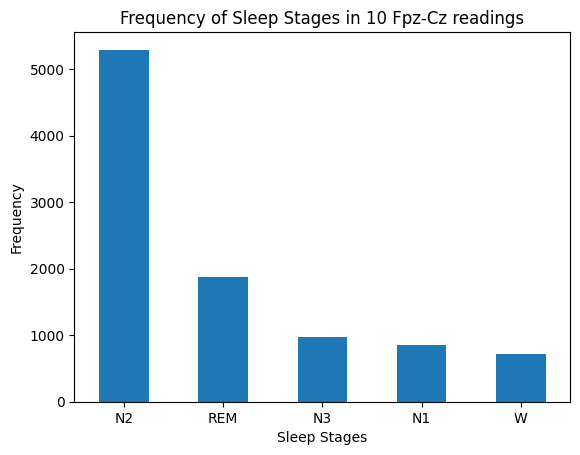

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

data_shape = data.shape
labels_shape = labels.shape

print("shape of features is " + str(data_shape))
print("shape of labels is " + str(labels_shape))

label_count = pd.Series(labels).value_counts()
plt.figure()
label_count.plot(kind="bar")
plt.xticks(np.arange(len(label_count)), [class_dict[label] for label in label_count.index], rotation="horizontal")
plt.xlabel('Sleep Stages')
plt.ylabel("Frequency")
plt.title("Frequency of Sleep Stages in 10 Fpz-Cz readings")
plt.show()

##   Model
The model includes the model definitation which usually is a class, model training, and other necessary parts.
  * Model architecture: layer number/size/type, activation function, etc
  * Training objectives: loss function, optimizer, weight of each loss term, etc
  * Others: whether the model is pretrained, Monte Carlo simulation for uncertainty analysis, etc
  * The code of model should have classes of the model, functions of model training, model validation, etc.
  * If your model training is done outside of this notebook, please upload the trained model here and develop a function to load and test it.


As I stated above, for now I have replicated the architecture of the original DeepSleepNet using multiple keras Layers combined in a keras Model. The order of operations is as follows:

1. Conv2D - input_channels=1, output_channels=64, stride=6, activation=relu
2. MaxPool2D - pool=8, stride=8
3. Dropout - 0.5
4. Conv2D - input_channels=64, output_channels=128, stride=1, activation=relu
5. Conv2D - input_channels=128, output_channels=128, stride=1, activation=relu
6. Conv2D - input_channels=64, output_channels=128, stride=1, activation=relu
7. MaxPool2D - pool=4, stride=4
8. Reshape - to (batch_size, 2048)

Save this output to cnn1

Using the original input, perform the following:

9. Conv2D - input_channels=1, output_channels=64, stride=6, activation=relu
10. MaxPool2D - pool=4, stride=4
11. Dropout - 0.5
12. Conv2D - input_channels=64, output_channels=128, stride=1, activation=relu
13. Conv2D - input_channels=128, output_channels=128, stride=1, activation=relu
14. Conv2D - input_channels=64, output_channels=128, stride=1, activation=relu
15. MaxPool2D - pool=2, stride=2
16. Reshape - to (batch_size, 1024)

Save this output to cnn2. Concatenate cnn1 and cnn2 on the second (last) axis

Use the concatenation as the input to the following:

17. Dense/Fully Connected - to 1024 units, activation = relu

Save this output to fc

Use the concatenation as the input to the following:

18. Reshape - to (batch_ize, 3072)
19. Bidirectional RNN using LSTM cell - 512 hidden units

Save this output to rnn. Take element-wise sum of fc and sum as step 20.

21. Dense/Fully Connected - to 5 units representing our 5 classes, activation = softmax. Return outcome as soft labels

Other parmaeters to note:
 - optimizer = Adam
 - loss function = Sparse Cross Entropy
 - training for 1 epoch
 - batch_size = 100

Below is the code constructing this model, which is also located in deep_sleep_net_teacher.py in my repo:

In [6]:
from keras import layers
from keras.models import Model
import os


def get_deep_sleep_teacher_model(x_train, y_train, should_train=True, MODEL_DIR=None):
    # to avoid re-training if a model is already saved, just load and return it
    # but don't don't actually do this in colab notebook
    # if os.path.isfile(MODEL_DIR):
    #     return keras.models.load_model(MODEL_DIR)

    model = deep_sleep_net_teacher(x_train)

    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

    if should_train==False:
      return model

    model.fit(x_train, y_train, epochs=1, batch_size=100,
              validation_split=0.1)

    # also no need to save the model here
    # model.save(MODEL_DIR)
    return model


# build the model architecture
def deep_sleep_net_teacher(input_var):
    wd = 1e-3
    input_layer = layers.Input(
        shape=(input_var.shape[1], input_var.shape[2], input_var.shape[3]))

    # steps of pre-training model in original DSS - Convolution
    cnn1 = deep_feature_net_cnn1(input_layer, wd)
    cnn2 = deep_feature_net_cnn2(input_layer, wd)
    network = layers.Concatenate(axis=-1)([cnn1, cnn2])
    network = layers.Dropout(0.5)(network)

    # final layer of pretrain model in original DSS
    network = layers.Flatten(input_shape=(1, 3072))(network)
    print("\nnetwork shape after pre-training " +
          str(network.shape) + '\n')

    # steps of fine-tuning model in original DSS - RNN
    fc = deep_sleep_net_fc(network)
    rnn = deep_sleep_net_rnn(network)
    final_output = layers.Add()([fc, rnn])
    final_output = layers.Dropout(0.5)(final_output)

    # soft labels of 5 possible sleep stages
    final_output = layers.Dense(5, activation="softmax")(final_output)
    print("\nfinal output shape after fine-tuning " +
          str(final_output.shape) + '\n')
    model = Model(inputs=input_layer, outputs=final_output)
    return model


def deep_feature_net_cnn1(input_layer, wd):

    output = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=(6, 1), padding="same",
                           activation="relu", kernel_regularizer=keras.regularizers.l2(wd), name="teacherConv1")(input_layer)

    output = layers.MaxPooling2D(pool_size=(
        8, 1), strides=(8, 1), padding="same", name="teacherMaxPool1")(output)

    output = layers.Dropout(0.5, name="teacherDropout1")(output)

    output = layers.Conv2D(filters=128, kernel_size=(1, 64),
                           strides=(1, 1), padding="same", activation="relu", name="teacherConv2")(output)
    output = layers.Conv2D(filters=128, kernel_size=(1, 128),
                           strides=(1, 1), padding="same", activation="relu", name="teacherConv3")(output)
    output = layers.Conv2D(filters=128, kernel_size=(1, 128),
                           strides=(1, 1), padding="same", activation="relu", name="teacherConv4")(output)

    output = layers.MaxPooling2D(pool_size=(
        4, 1), strides=(4, 1), padding="same", name="teacherMaxPool2")(output)
    output = layers.Reshape((-1, 2048), name="teacherReshape1")(output)
    return output


def deep_feature_net_cnn2(input_var, wd):
    output = layers.Conv2D(filters=64, kernel_size=(1, 1),
                           strides=(50, 1), padding="same", activation="relu", name="teacherConv5")(input_var)

    output = layers.MaxPooling2D(pool_size=(
        4, 1), strides=(4, 1), padding="same", name="teacherMaxPool3")(output)

    output = layers.Dropout(0.5, name="teacherDropout2")(output)

    output = layers.Conv2D(filters=128, kernel_size=(1, 64),
                           strides=(1, 1), padding="same", activation="relu", name="teacherConv6")(output)
    output = layers.Conv2D(filters=128, kernel_size=(1, 128),
                           strides=(1, 1), padding="same", activation="relu", name="teacherConv7")(output)
    output = layers.Conv2D(filters=128, kernel_size=(1, 128),
                           strides=(1, 1), padding="same", activation="relu", name="teacherConv8")(output)

    output = layers.MaxPooling2D(pool_size=(
        2, 1), strides=(2, 1), padding="same", name="teacherMaxPool4")(output)
    output = layers.Reshape((-1, 1024), name="teacherReshape2")(output)
    return output


def deep_sleep_net_fc(input_layer):
    return layers.Dense(1024, activation="relu", name="teacherFC1")(input_layer)


def deep_sleep_net_rnn(input_layer):
    # reshape into (batch_size, seq_length, input_dim)
    output = layers.Reshape(input_shape=input_layer.shape,
                            target_shape=(-1, 3072), name="teacherReshape3")(input_layer)
    output = layers.Bidirectional(
        layers.LSTM(512), merge_mode="concat", name="teacherBidirectional1")(output)
    return output


For the purposes of this demoing the training notebook, I slice our already subsetted dataset to use 2000 epoch samples. Even using the full 10-patient subset would have a runtime of around 8 minutes on Colab.

The data is split 9:1 for our training/test sets. When fitting the model in the above code, we split the training set 9:1 for training/validation sets.

In [7]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 12345
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

# get first 1000 samples for demo training
data_demo_training = data[0:1000, :, :, :]
labels_demo_training = labels[0:1000,]

x_train_demo, x_test_demo, y_train_demo, y_test_demo = train_test_split(
        data_demo_training, labels_demo_training, test_size=0.1, random_state=RANDOM_STATE)

print("training data shape" + str(x_train_demo.shape))

deep_sleep_teacher_demo = get_deep_sleep_teacher_model(x_train_demo, y_train_demo, True)
print(deep_sleep_teacher_demo.summary())

# don't really care about the outcomes here, just evaluating to show it works
deep_sleep_teacher_demo.evaluate(x_test_demo, y_test_demo, batch_size=100)


training data shape(900, 3000, 1, 1)

network shape after pre-training (None, 3072)


final output shape after fine-tuning (None, 5)

9/9 [==============================] - 90s 8s/step - loss: 1.3870 - accuracy: 0.5951 - val_loss: 1.3012 - val_accuracy: 0.5444
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3000, 1, 1)]         0         []                            
                                                                                                  
 teacherConv1 (Conv2D)       (None, 500, 1, 64)           128       ['input_1[0][0]']             
                                                                                                  
 teacherConv5 (Conv2D)       (None, 60, 1, 64)            128       ['input_1[0][0]']             
                               

[1.1815563440322876, 0.6800000071525574]

Now that we see that training is working with the teacher model, let's load my pretrained model from my Google Drive and run some predictions on the full 10-subjection subset.

The pretrained model used all 44 files, with a 9:1 split for training/testing and another 9:1 split for testing/validation. It was trained on 1 epoch for the sake of getting it done for now, and uses batch_size = 100

In [8]:
pretrained_teacher_weights = 'https://drive.google.com/uc?id=10Oc88pk-Uxwy_rAkVCt4SGr7JL7kTS9p'
gdown.download(pretrained_teacher_weights, 'deep_sleep_net_teacher_weights.h5')

# note - not actually using the train features and labels here because we return model before fitting,
# will refactor this when I have more time
deep_sleep_net_teacher = get_deep_sleep_teacher_model(x_train_demo, y_train_demo, False)
deep_sleep_net_teacher.load_weights('deep_sleep_net_teacher_weights.h5')
print("finished loading weights")

Downloading...
From (original): https://drive.google.com/uc?id=10Oc88pk-Uxwy_rAkVCt4SGr7JL7kTS9p
From (redirected): https://drive.google.com/uc?id=10Oc88pk-Uxwy_rAkVCt4SGr7JL7kTS9p&confirm=t&uuid=a28afd25-2cb7-45cd-9c53-2f709737e91c
To: /content/deep_sleep_net_teacher_weights.h5
100%|██████████| 109M/109M [00:00<00:00, 192MB/s]



network shape after pre-training (None, 3072)


final output shape after fine-tuning (None, 5)

finished loading weights


## Student Network and Distillation

In addition to replicating the DeepSleepNet model, I was able to get a working example of knowledge distillation using the keras Distiller class. First, I needed to design a student network, which was pretty easy. SleepKD's approach to designing the TA and student networks was to iteratively half the number of CNN layers and LSTM hidden units for each network. Below is code showing that, which is located in deepsleep_student.py in my repo.

In [9]:
import keras
from keras import layers
from keras.models import Model
import os


def get_deep_sleep_student_model(x_train, y_train, should_train=True, MODEL_DIR=None):
    # to avoid re-training if a model is already saved, just load and return it
    # but don't worry about that in colab
    # if os.path.isfile(MODEL_DIR):
    #     student_model_trained = keras.models.load_model(MODEL_DIR)
    #     student_model_blank = deep_sleep_net_student(x_train)
    #     return student_model_blank, student_model_trained

    student_model_blank = deep_sleep_net_student(x_train)
    student_model_trained = deep_sleep_net_student(x_train)

    student_model_trained.compile(optimizer='adam',
                                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

    student_model_trained.fit(x_train, y_train, epochs=1, batch_size=100,
                              validation_split=0.1)

    # comment out for colab
    # student_model_trained.save(MODEL_DIR)
    return student_model_blank, student_model_trained


# build the model architecture
def deep_sleep_net_student(input_var):
    wd = 1e-3
    input_layer = layers.Input(
        shape=(input_var.shape[1], input_var.shape[2], input_var.shape[3]))

    # steps of pre-training model in original DSS - Convolution
    cnn1 = deep_feature_net_cnn1(input_layer, wd)
    cnn2 = deep_feature_net_cnn2(input_layer, wd)
    network = layers.Concatenate(axis=-1)([cnn1, cnn2])
    network = layers.Dropout(0.5)(network)

    # final layer of pretrain model in original DSS
    network = layers.Flatten(input_shape=(1, 3072))(network)
    print("\nnetwork shape after end of pre-train " +
          str(network.shape) + '\n')

    # steps of fine-tuning model in original DSS - RNN
    fc = deep_sleep_net_fc(network)
    rnn = deep_sleep_net_rnn(network)
    final_output = layers.Add()([fc, rnn])
    final_output = layers.Dropout(0.5)(final_output)

    # soft labels of 5 possible sleep stages
    final_output = layers.Dense(5, activation="softmax")(final_output)
    model = Model(inputs=input_layer, outputs=final_output)
    return model


def deep_feature_net_cnn1(input_layer, wd):

    output = layers.Conv2D(filters=64, kernel_size=(1, 1), strides=(6, 1), padding="same",
                           activation="relu", kernel_regularizer=keras.regularizers.l2(wd), name="studentConv1")(input_layer)

    output = layers.MaxPooling2D(pool_size=(
        8, 1), strides=(8, 1), padding="same", name="studentMaxPool1")(output)

    output = layers.Dropout(0.5, name="studentDropout1")(output)

    output = layers.Conv2D(filters=128, kernel_size=(1, 64),
                           strides=(1, 1), padding="same", activation="relu", name="studentConv2")(output)

    output = layers.MaxPooling2D(pool_size=(
        4, 1), strides=(4, 1), padding="same", name="studentMaxPool2")(output)
    output = layers.Reshape((-1, 2048), name="studentReshape1")(output)
    return output


def deep_feature_net_cnn2(input_var, wd):
    output = layers.Conv2D(filters=64, kernel_size=(1, 1),
                           strides=(50, 1), padding="same", activation="relu", name="studentConv3")(input_var)

    output = layers.MaxPooling2D(pool_size=(
        4, 1), strides=(4, 1), padding="same", name="studentMaxPool3")(output)

    output = layers.Dropout(0.5, name="studentDropout2")(output)

    output = layers.Conv2D(filters=128, kernel_size=(1, 64),
                           strides=(1, 1), padding="same", activation="relu", name="studentConv4")(output)

    output = layers.MaxPooling2D(pool_size=(
        2, 1), strides=(2, 1), padding="same", name="studentMaxPool4")(output)
    output = layers.Reshape((-1, 1024), name="studentReshape2")(output)
    return output


def deep_sleep_net_fc(input_layer):
    print("fc on input layer " + str(input_layer.shape))
    return layers.Dense(512, activation="relu", name="studentFC1")(input_layer)


def deep_sleep_net_rnn(input_layer):
    # reshape into (batch_size, seq_length, input_dim)
    output = layers.Reshape(input_shape=input_layer.shape,
                            target_shape=(-1, 3072), name="studentReshape3")(input_layer)
    output = layers.Bidirectional(
        layers.LSTM(256), merge_mode="concat", name="studentBidirectional1")(output)
    return output


In [10]:
# first model hasn't been trained, second one has been though on our demo dataset from earlier
# recall the demo subset is using the first 1000 samples of our 10-subject subset
# use first as input to Distiller, second just to show that training student model works
deep_sleep_net_student, deep_sleep_net_student_demo = get_deep_sleep_student_model(x_train_demo, y_train_demo)

# prepare one more blank student model - load pretrained weights for student model later
deep_sleep_net_student_copy = keras.models.clone_model(deep_sleep_net_student)

print(deep_sleep_net_student.summary())
print("note the decreased size of parameters in the student - 36.02MB")

# again, just to show in colab that evaluation works as well
# don't care about the values we get as a result
deep_sleep_net_student_demo.evaluate(x_test_demo, y_test_demo, batch_size=100)


network shape after end of pre-train (None, 3072)

fc on input layer (None, 3072)

network shape after end of pre-train (None, 3072)

fc on input layer (None, 3072)
9/9 [==============================] - 18s 1s/step - loss: 4.6476 - accuracy: 0.4840 - val_loss: 1.3925 - val_accuracy: 0.5444
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 3000, 1, 1)]         0         []                            
                                                                                                  
 studentConv1 (Conv2D)       (None, 500, 1, 64)           128       ['input_3[0][0]']             
                                                                                                  
 studentConv3 (Conv2D)       (None, 60, 1, 64)            128       ['input_3[0][0]']           

[1.2800310850143433, 0.6800000071525574]

In [11]:
# load our pretrained student weights to the copy of the blank model
pretrained_student_weights = 'https://drive.google.com/uc?id=1hS9R9gz8uaZmmxjHLtwFsUXei8Dd7X76'
gdown.download(pretrained_student_weights, 'deep_sleep_net_student_weights.h5')

deep_sleep_net_student_copy.load_weights('deep_sleep_net_student_weights.h5')
print("finished loading weights")

Downloading...
From: https://drive.google.com/uc?id=1hS9R9gz8uaZmmxjHLtwFsUXei8Dd7X76
To: /content/deep_sleep_net_student_weights.h5
100%|██████████| 37.8M/37.8M [00:00<00:00, 168MB/s]


finished loading weights


Next, I'll show the Distiller class I defined. For now this is pretty much taken from the keras Distillation example in their documentation at https://keras.io/examples/vision/knowledge_distillation/.

The distiller in the github repo is defined in main.py


In [12]:
# because this is a custom class inheritating from Keras, we
# need to define how to serialize and deserialize the object
# begin by adding a decorator specifying that the class is serializable
@keras.saving.register_keras_serializable()
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student
        self.student_loss_fn = None
        self.distillation_loss_fn = None
        self.alpha = None
        self.temperature = None

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """Configure the distiller.
        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def compute_loss(
        self, x=None, y=None, y_pred=None, sample_weight=None, allow_empty=False
    ):
        teacher_pred = self.teacher(x, training=False)
        student_loss = self.student_loss_fn(y, y_pred)

        distillation_loss = self.distillation_loss_fn(
            tf.nn.softmax(teacher_pred / self.temperature, axis=1),
            tf.nn.softmax(y_pred / self.temperature, axis=1),
        ) * (self.temperature**2)

        loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss
        return loss

    def call(self, x):
        return self.student(x)

    # add the student and teacher attributes to the config so it can be re-defined when
    # loading the model
    # simply return a dictionary defining the objects
    def get_config(self):
        config = super().get_config()
        config.update({
            "student": keras.saving.serialize_keras_object(self.student),
            "teacher": keras.saving.serialize_keras_object(self.teacher),
        })
        return config

    # also need to make the attributes defined in compile() available for
    # serialization
    def get_compile_config(self):
        # serialize params used in compilation
        return {
            "student_loss_fn": keras.saving.serialize_keras_object(self.student_loss_fn),
            "distillation_loss_fn": keras.saving.serialize_keras_object(self.distillation_loss_fn),
            "alpha": keras.saving.serialize_keras_object(self.alpha),
            "temperature": keras.saving.serialize_keras_object(self.temperature),
            "optimizer": keras.saving.serialize_keras_object(self.optimizer),
            "metrics": keras.saving.serialize_keras_object(self.metrics),
        }

    @classmethod
    def from_config(cls, config):
        student_config = config.pop("student")
        teacher_config = config.pop("teacher")

        student = keras.saving.deserialize_keras_object(student_config)
        teacher = keras.saving.deserialize_keras_object(teacher_config)
        return cls(student, teacher, **config)

    def compile_form_config(self, config):
        student_loss_fn_config = config.pop("student_loss_fn")
        distillation_loss_fn_config = config.pop("distillation_loss_fn")
        alpha_config = config.pop("alpha")
        temperature_config = config.pop("temperature")
        optimizer_config = config.pop("optimizer")
        metrics_config = config.pop("metrics")

        student_loss_fn = keras.saving.deserialize_keras_object(
            student_loss_fn_config)
        distillation_loss_fn = keras.saving.deserialize_keras_object(
            distillation_loss_fn_config)
        alpha = keras.saving.deserialize_keras_object(alpha_config)
        temperature = keras.saving.deserialize_keras_object(temperature_config)
        optimizer = keras.saving.deserialize_keras_object(optimizer_config)
        metrics = keras.saving.deserialize_keras_object(metrics_config)
        self.compile(optimizer, metrics, student_loss_fn,
                     distillation_loss_fn, alpha, temperature)

We'll run through the same process as before - show a simple example of the distillation working on our demo dataset, then load pretrained weights to another instance that we'll use to run predictions

In [13]:
distiller = Distiller(student=deep_sleep_net_student, teacher=deep_sleep_net_teacher)

distiller.compile(
            optimizer="adam",
            metrics=["accuracy"],
            student_loss_fn=keras.losses.SparseCategoricalCrossentropy(
                from_logits=True),
            distillation_loss_fn=keras.losses.KLDivergence(),
            alpha=0.1,
            temperature=10,
        )

distiller.fit(x_train_demo, y_train_demo, epochs=1)
distiller.evaluate(x_test_demo, y_test_demo, batch_size=100)


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 3s 3s/step - accuracy: 0.6600


0.6600000262260437

In [14]:
pretrained_distiller_weights = 'https://drive.google.com/uc?id=1YB9jqGX3TQHX94gCUrZS_hM-fdrea5Ap'
gdown.download(pretrained_distiller_weights, 'deep_sleep_net_distiller_weights.h5')


distiller = Distiller(student=deep_sleep_net_student, teacher=deep_sleep_net_teacher)

# for subclassed model, need to build before loading weights
distiller.build(x_train_demo.shape)

distiller.load_weights('deep_sleep_net_distiller_weights.h5')
print("finished loading weights")

Downloading...
From (original): https://drive.google.com/uc?id=1YB9jqGX3TQHX94gCUrZS_hM-fdrea5Ap
From (redirected): https://drive.google.com/uc?id=1YB9jqGX3TQHX94gCUrZS_hM-fdrea5Ap&confirm=t&uuid=a6217e09-074e-4c98-b096-77a2faeaccd4
To: /content/deep_sleep_net_distiller_weights.h5
100%|██████████| 147M/147M [00:00<00:00, 185MB/s]


finished loading weights


# Results
In this section, you should finish training your model training or loading your trained model. That is a great experiment! You should share the results with others with necessary metrics and figures.

Please test and report results for all experiments that you run with:

*   specific numbers (accuracy, AUC, RMSE, etc)
*   figures (loss shrinkage, outputs from GAN, annotation or label of sample pictures, etc)


For the results sections, we'll be evaluating the performance of my three pretrained models: the teacher, the student, and the distilled student

# Deep Sleep Net Teacher (Original DeepSleepNet Architecture)
First, let's get results for our pretrained teacher model. Let's get another train/test split, this time from the entire 10-subject subset. We'll run a prediction on that test set and see how we do

31/31 [==============================] - 15s 435ms/step
accuracy of pretrained model: 0.4840698869475848
f1-score of pretrained model: 0.4289762218968366


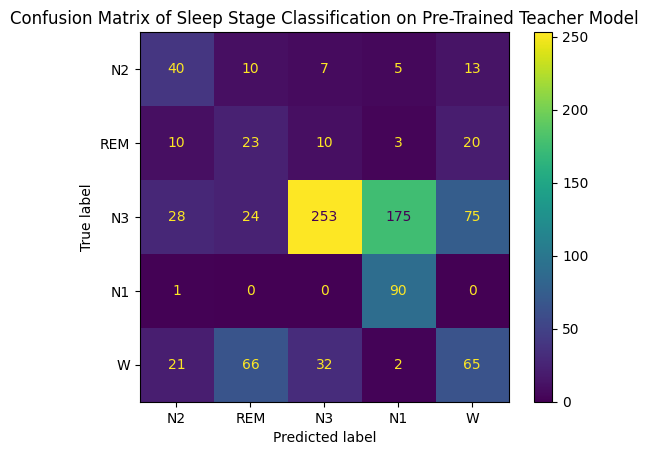

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

x_train, x_test, y_train, y_test = train_test_split(
        data, labels, test_size=0.1, random_state=RANDOM_STATE)

teacher_preds = deep_sleep_net_teacher.predict(x_test)
# get class with highest probability
teacher_preds = np.argmax(teacher_preds, axis=1)

teacher_accuracy = accuracy_score(y_test, teacher_preds)
teacher_f1_score = f1_score(y_test, teacher_preds, average="macro")

print("accuracy of pretrained model: " + str(teacher_accuracy))
print("f1-score of pretrained model: " + str(teacher_f1_score))

label_name_list = [class_dict[label] for label in label_count.index]

confusion_matrix = confusion_matrix(y_test, teacher_preds)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=label_name_list)
display_matrix.plot()
plt.title("Confusion Matrix of Sleep Stage Classification on Pre-Trained Teacher Model")
plt.show()


# Student Model

Here we'll follow the same process as for the teacher network. Using the same dataset split, we'll run predictions on the pretrained student model and take a look at our results

31/31 [==============================] - 3s 72ms/step
accuracy of pre-trained student model: 0.605344295991778
f1-score of pre-trained student model: 0.4915388301793051


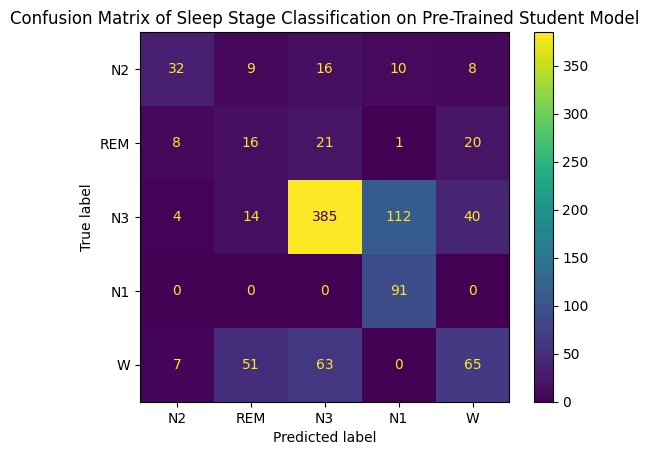

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

student_preds = distiller.predict(x_test)
# get class with highest probability
student_preds = np.argmax(student_preds, axis=1)

student_accuracy = accuracy_score(y_test, student_preds)
student_f1_score = f1_score(y_test, student_preds, average="macro")

print("accuracy of pre-trained student model: " + str(student_accuracy))
print("f1-score of pre-trained student model: " + str(student_f1_score))

label_name_list = [class_dict[label] for label in label_count.index]

confusion_matrix = confusion_matrix(y_test, student_preds)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=label_name_list)
display_matrix.plot()
plt.title("Confusion Matrix of Sleep Stage Classification on Pre-Trained Student Model")
plt.show()

# Distiller

We'll do the same thing we did in the previous two sections one last time. This time we evaluate the performance of the distilled student method

31/31 [==============================] - 2s 72ms/step
accuracy of pre-trained, distilled student model: 0.605344295991778
f1-score of pre-trained, distilled model: 0.4915388301793051


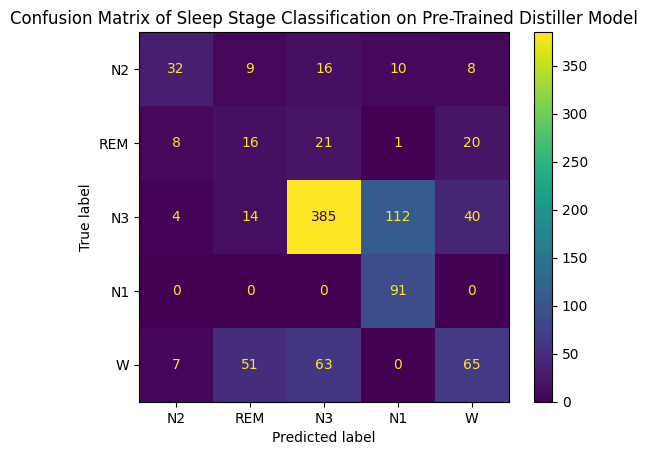

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

distiller_preds = distiller.predict(x_test)
# get class with highest probability
distiller_preds = np.argmax(distiller_preds, axis=1)

distiller_accuracy = accuracy_score(y_test, distiller_preds)
distiller_f1_score = f1_score(y_test, distiller_preds, average="macro")

print("accuracy of pre-trained, distilled student model: " + str(distiller_accuracy))
print("f1-score of pre-trained, distilled model: " + str(distiller_f1_score))

label_name_list = [class_dict[label] for label in label_count.index]

confusion_matrix = confusion_matrix(y_test, distiller_preds)
display_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=label_name_list)
display_matrix.plot()
plt.title("Confusion Matrix of Sleep Stage Classification on Pre-Trained Distiller Model")
plt.show()


## Model comparison

In this section, we'll compare the performance of our three pretrained models: the teacher, student, and distilled student.

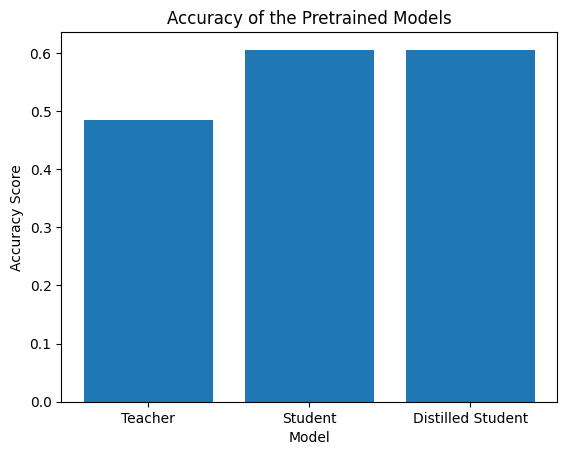

teacher accuracy: 0.4840698869475848
student accuracy: 0.605344295991778
distilled accuracy: 0.605344295991778


In [20]:
labels_list = ['Teacher', 'Student', 'Distilled Student']
plt.bar(labels_list, [teacher_accuracy, student_accuracy, distiller_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of the Pretrained Models')
plt.show()

print('teacher accuracy: ' + str(teacher_accuracy))
print('student accuracy: ' + str(student_accuracy))
print('distilled accuracy: ' + str(distiller_accuracy))


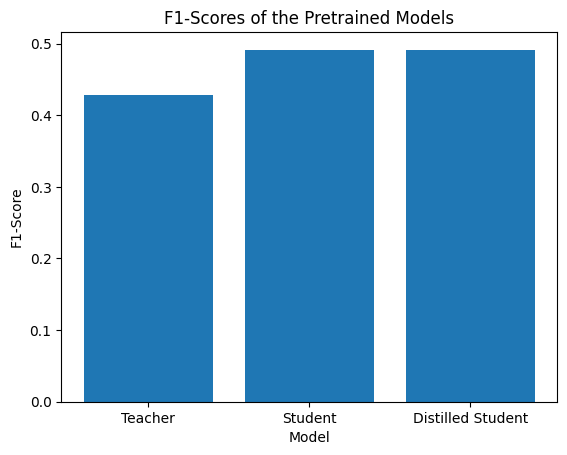

teacher accuracy: 0.4289762218968366
student accuracy: 0.4915388301793051
distilled accuracy: 0.4915388301793051


In [21]:
plt.bar(labels_list, [teacher_f1_score, student_f1_score, distiller_f1_score])
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Scores of the Pretrained Models')
plt.show()

print('teacher accuracy: ' + str(teacher_f1_score))
print('student accuracy: ' + str(student_f1_score))
print('distilled accuracy: ' + str(distiller_f1_score))


Surprisingly enough, it looks like both the distilled student and the student model performed better than the more complex teacher model, and they had similar performance levels. However, the increase in f1-scores from ~0.42 to ~0.49 was not as drastic as the increase in accuracy from  ~0.48 to ~0.60.

There are multiple reasons these results may have occurred - the low epoch value in training, potential overlap in data used when training/testing locally vs that used on colab, some mistake I made when setting up the models in colab, good luck in guessing for this batch, or some other reason. I don't have time to look more into this now, so it'll be something to keep an eye on for the final draft.

# Discussion

In this section,you should discuss your work and make future plan. The discussion should address the following questions:
  * Make assessment that the paper is reproducible or not.
  * Explain why it is not reproducible if your results are kind negative.
  * Describe “What was easy” and “What was difficult” during the reproduction.
  * Make suggestions to the author or other reproducers on how to improve the reproducibility.
  * What will you do in next phase.



### Make assessment that the paper is reproducible or not:

I don't want to say that the paper is definitely not reproducible, because I think if I had sufficient time, computational resources and experience (emphasis on needing more experience), something could be worked out that could get similar results in the paper. However, in the scope of this class and given that my background is not in machine learning or data science, reproducing the results is not going to be a realistic goal.

### Explain why it is not reproducible if your results are kind negative:

I think the biggest hurdle to reproducing the paper is just the lacking implementation details in the SleepKD paper and source code regarding how they put all the parts (i.e. the loss layer and models) together. As a few examples, we don't know for sure:
 - how they reconstructed the SalientSleepNet and DeepSleepNet models
 - where in the architecture of the models the SleepKD layer was inserted other than "intermediate layers"
 - how to extract the features they are looking for as an input to the layer
 - what are the parameters of the architecture they used (i.e input and output channels for each layer.

We don't even know what exactly the teacher network looks like because I don't think they reused the architecture from DeepSleepNet. For instance, they state in their paper that the teacher used four CNN layers, but the original DeepSleepNet has eight. So which were taken out? I do wish I'd noticed this earlier because it should've clued me in to the fact that they weren't using the original code exactly.

All this lead to a lot of fumbling around on my end, which maybe could have been mitigated if I'd reached out for help earlier.

### Describe “What was easy” and “What was difficult” during the reproduction.

I've spoken a lot on what was difficult already. Regarding what is easy, once I spoke to a TA and got the idea of replicating the logic of the DeepSleepNet architecture instead of forcing the source code through or trying to get an exact reproduction, this became a much more manageable and actually enjoyable process. I still had to look through a lot of documentation regarding keras layers and how to translate the tf.nn operations in keras (i.e which parameters to set to what to get the right shape), but as I got more familiar with the library and codebases this wasn't too bad. I was able to relate the keras layers to our homework assignments and conceptually connect the dots with what I was trying to do.

Once I had the teacher network working, it was also pretty easy to design a student network and use a Distiller object teach the student from the teacher. For the student network it just involved removing some of the convolution layers, bumping down the number of LSTM hidden units to 256, and adjusting the input to the Bidirectional layer accordingly. However, since a Distiller is a custom object, it took a bit of reading up on how to save that object to a file.


### Make suggestions to the author or other reproducers on how to improve the reproducibility

To improve the reproducibility, going off of what I said above I think there just needs to be more clarification regarding what steps the authors took to put everything together. In addition to the points above, I think they should explain or provide an example of knowledge distillation as a layer instead of the Distiller class that seems to be the standard procedure in keras. Even as I replicate the DeepSleepNet model architecture, this would be the biggest issue in replicating their appraoch to distillation.

### What will you do in next phase.

What to do in the next phase is the question of the day. Because I was so late in actually making progress in the paper, there's a lot left that I could do and I don't think it's all feasible. I also have to keep in mind that for personal reasons, I need to have the final submission finished earlier than the deadline of May 5th, so that's a weekend of work I'm losing out on. Nonetheless there are a few options and varying prioritizations I've decided on.

I think the most realistic first step is to get a teacher assistant module working with DeepSleepNet, which won't be hard since I already have the setup  for teacher/student models. Ideally what I'll see as a result of that is that the student will not have as much of a decrease in accuracy when it's trained from the TA network as opposed to the teacher.

Once that is working, I think the next realistic option is to shift towards SalientSleepNet. I'd do the same thing as I'd done for DeepSleepNet - replicate the architecture using Keras and design student and TA networks once that is done.

Once these are working, I'll want to take some time to optimize my models. That means testing out different hyperparameters, optimizer types, etc. to try to get my models performing better. I'll also want to refactor/organize my code better since, at the risk of repeating myself too much, this is all thrown together haphazardly to just try to get something working. So I know I can and should get things at least a little cleaner.

Of course I'll also be adding more to the report, specifically regarding data and results visualization. Since it's my first time working with colab, getting things working here has also been a time-consuming endeavor and I'll have to dedicate sufficient time for that.

Lowest on the priority list is actually figuring out how to get the SleepKD layer from the original paper working. If anyone reading this has the know-how of how I could get this work and would be generous enough to share their knowledge, I'd be very grateful. On my own though, I think this will take too long and if there's other things I can do that are feasible, I'd rather focus on those.

All in all, I think it's safe to say I have plenty more to work on for the last 2.5ish weeks. Now that I have an idea of what I'm doing, I'm hoping this will be a much more enjoyable and less stressful experience than coming up with this draft was.

# References

[Hinton et al., 2015] Geoffrey Hinton, Oriol Vinyals, Jeff  Dean, et al. Distilling the knowledge in a neural network.  arXiv preprint arXiv:1503.02531, 2(7), 2015.

[Huang and Wang, 2017] Zehao Huang and Naiyan Wang. Like what you like: Knowledge distill via neuron selec-tivity transfer. arXiv preprint arXiv:1707.01219, 2017.

[Kemp et al., 2018] Brian Kemp, Aeilko Zwinderman, Tuk B., et al. The sleep-edf database [dataset] https://doi.org/10.13026/C2X676, 2018

[Liang et al., 2023]  Heng Liang, Yucheng Liu, Haichao Wang, et al .Teacher Assistant-Based Knowledge Distillation Extracting Multi-level Features on Single Channel Sleep EEG, https://github.com/HychaoWang/SleepKD?tab=readme-ov-file, 2023.

[Mirzadehet al., 2020] Seyed Iman Mirzadeh, Mehrdad Farajtabar, Ang Li, Nir Levine, Akihiro Matsukawa, and Hassan Ghasemzadeh. Improved knowledge distillation via teacher assistant. In Proceedings of the AAAI con-ference on artificial intelligence, volume 34, pages 5191– 5198, 2020.

[Romero et al., 2014] Adriana Romero, Nicolas Ballas,  Samira Ebrahimi Kahou, Antoine Chassang, Carlo Gatta,  and Yoshua Bengio. Fitnets: Hints for thin deep nets.  arXiv preprint arXiv:1412.6550, 2014.  

[Sirvan et al., 2016] Khalighi Sirvan, José Moutinho Santos, and Urbano Nunes. “ISRUC-Sleep: A comprehensive public dataset for sleep researchers.“Computer methods and programs in biomedicine 124 (2016): 180-192., https://sleeptight.isr.uc.pt/, 2016

[Son et al., 2021] Wonchul Son, Jaemin Na, Junyong Choi, and Wonjun Hwang. Densely guided knowledge distilla-tion using multiple teacher assistants. In Proceedings of the IEEE/CVF International Conference on Computer Vision, pages 9395–9404, 2021.

[Zhao et al., 2022] Borui Zhao, Quan Cui, Renjie Song, Yiyu Qiu, and Jiajun Liang. Decoupled knowledge distillation. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition, pages 11953– 11962, 2022.




# Feel free to add new sections